# Limits to Rule Curve Performance

Rule curves establish desired bounds on lake levels, and a means to assign dam operators with the clear operational targets. As stated in the 2000 rule curve order, the dams are to be operated in order to maintain lake levels with the 'middle portion' of rule curve. In recent years, this has been interpreted as maintaining levels within the range of 25% to 75% of the lower and upper rule curve limits.

This notebook establishes the range of inflows that can be effectively controlled within targets established by a particular rule curve order. The question being asked: "Given a set of rule curves for Rainy Lake, the existing flow constraints on upper Rainy River, what is the maximum inflow that can be accomodated?"

* <a href=#section01></a>
* <a href=#section04></a>
* <a href=#section05></a>
* <a href=#section06></a>

In [23]:
# Display graphics inline with the notebook
%matplotlib notebook

# Standard Python modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime

# Modules to display images and data tables
from IPython.display import Image
from IPython.core.display import display

# Directories
dir = '../data/'
img = '../images/'

<a name=section01></a>
## Import Rule Curves

Import previously stored data frames containing rule curve data.

In [88]:
RL1970 = pd.read_pickle(dir+'RL1970.pkl')
RL2000 = pd.read_pickle(dir+'RL2000.pkl')

RL1970.head()
RL2000.head()

,ELW,LRC,URC,EDL,EHW,AGO
2014-01-01,336.68,337.200000,337.450,336.900000,337.75,337.9
2014-01-02,336.68,337.194444,337.445,336.897778,337.75,337.9
2014-01-03,336.68,337.188889,337.440,336.895556,337.75,337.9
2014-01-04,336.68,337.183333,337.435,336.893333,337.75,337.9
2014-01-05,336.68,337.177778,337.430,336.891111,337.75,337.9


<IPython.core.display.Javascript object>


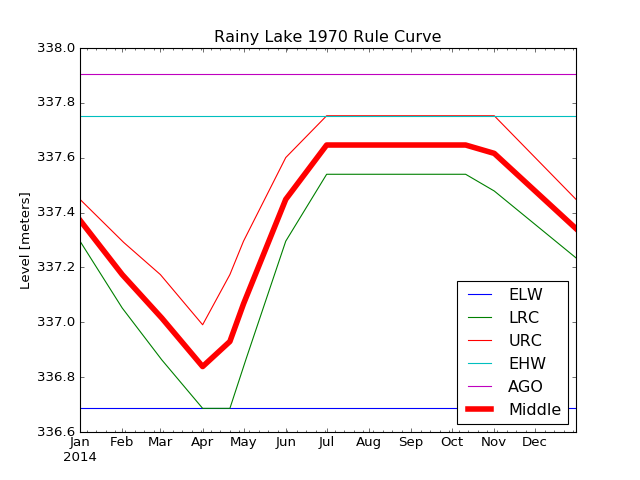

<IPython.core.display.Javascript object>


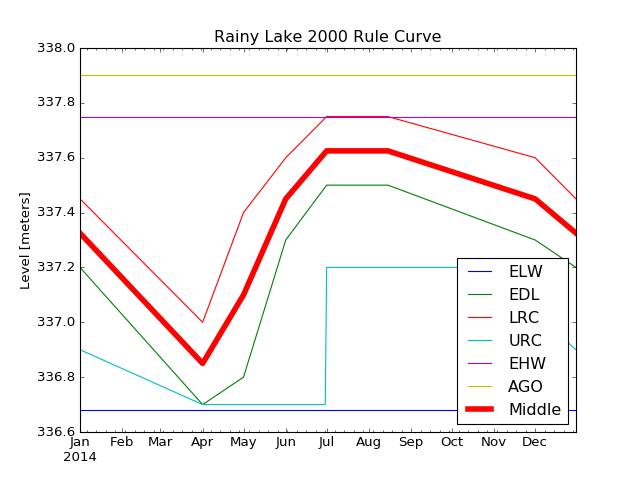

In [106]:
#plt.figure(figsize=(10,4))
#plt.hold(True)

RL1970.plot()
m1970 = (RL1970['URC'] + RL1970['LRC'])/2.0
m1970.plot(color='red',lw=5)
plt.title('Rainy Lake 1970 Rule Curve')
plt.ylabel('Level [meters]')
plt.legend(['ELW','LRC','URC','EHW','AGO','Middle'],loc='lower right')

#plt.figure(figsize=(10,4))
#plt.hold(True)

RL2000.plot()
m2000 = (RL2000['URC'] + RL2000['LRC'])/2.0
m2000.plot(color='red',lw=5)
plt.title('Rainy Lake 2000 Rule Curve')
plt.ylabel('Level [meters]')
plt.legend(['ELW','EDL','LRC','URC','EHW','AGO','Middle'],loc='lower right')


## 1970 Rule Curve Analysis

$$Q_{in} \leq Q_{in}^{max} = A(h)\frac{dh}{dt} + Q_{out}^{max}(h)$$

### Lake Area

<IPython.core.display.Javascript object>


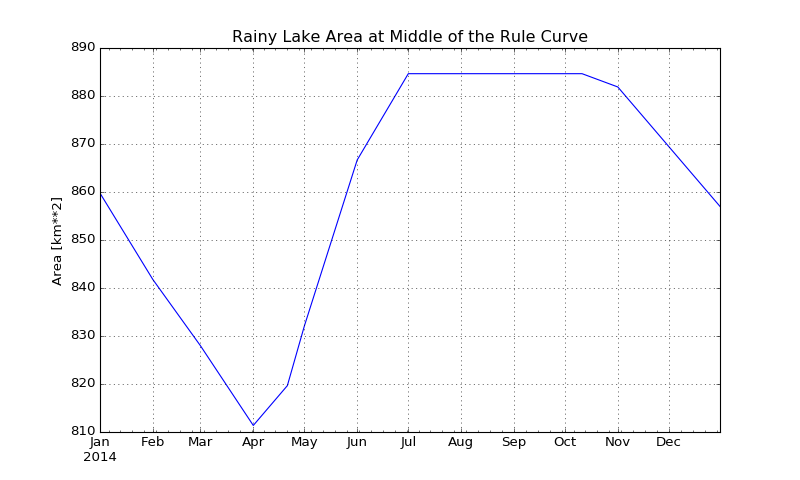

In [160]:
plt.figure(figsize=(10,6))
a1970 = 90.73 * m1970 - 2.975e+04
a1970.plot()
plt.title('Rainy Lake Area at Middle of the Rule Curve')
plt.ylabel('Area [km**2]')
plt.grid()

In [109]:
### Imputed Flowrate due to changes in level

$$A(h) \frac{dh}{dt}$$

<IPython.core.display.Javascript object>


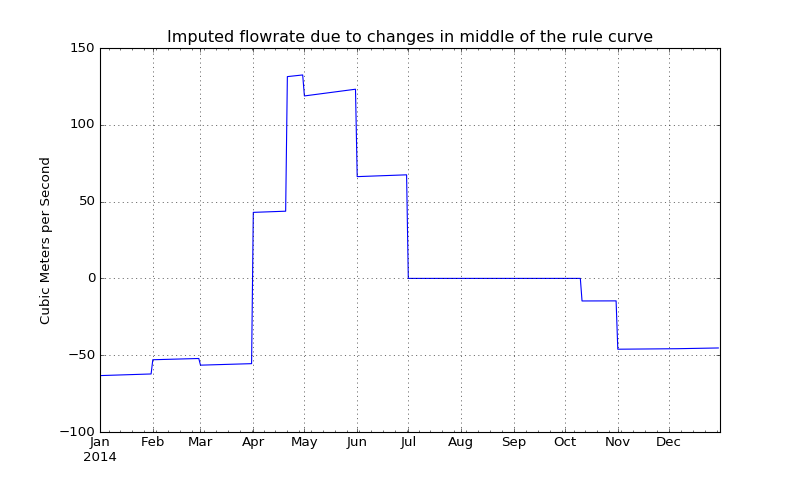

In [161]:
plt.figure(figsize=(10,6))
dv = (m1970.shift(-1) - m1970)*area*1.0e6/86400.0
dv.plot()
plt.ylabel('Cubic Meters per Second')
plt.title('Imputed flowrate due to changes in middle of the rule curve')
plt.grid()

<IPython.core.display.Javascript object>


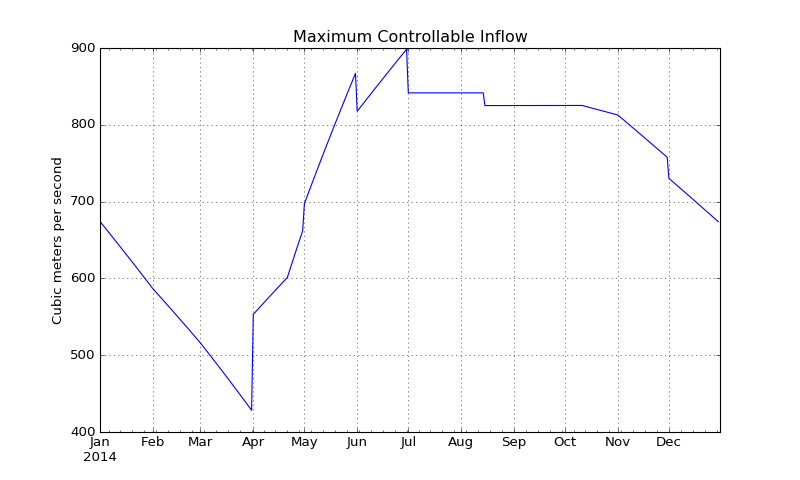

In [116]:
qout1970 = 650.0*(m1970-336.2)**0.7


qin1970 = qout1970 + dv

plt.figure(figsize=(10,6))
qin1970.plot()
plt.title('Maximum Controllable Inflow under 1970 Rule Curve')
plt.ylabel('Cubic meters per second')
plt.grid()

<IPython.core.display.Javascript object>


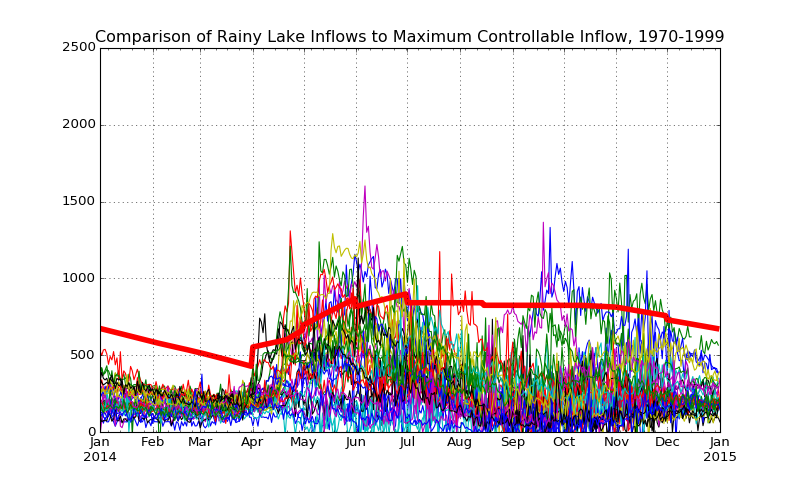

In [162]:
plt.figure(figsize=(10,6))

RLInflow = pd.read_pickle('../data/RLInflow.pkl')

e = 0*qin_max
cnt = 0

for (yr,r) in RLInflow['1970':'1999'].groupby(RLInflow['1970':'1999'].index.year):
    shift = datetime.datetime(2014,1,1) - datetime.datetime(yr,1,1)
    r = r.tshift(shift.days)
    r.plot()
    e += (r - qin_max) > 0.0
    cnt += 1

qin1970.plot(color='red',lw=5)
plt.title('Comparison of Rainy Lake Inflows to Maximum Controllable Inflow, 1970-1999')
plt.ylim(0,2500)
plt.grid()
plt.savefig('../images/RLMaxFlow1970.png')

<IPython.core.display.Javascript object>


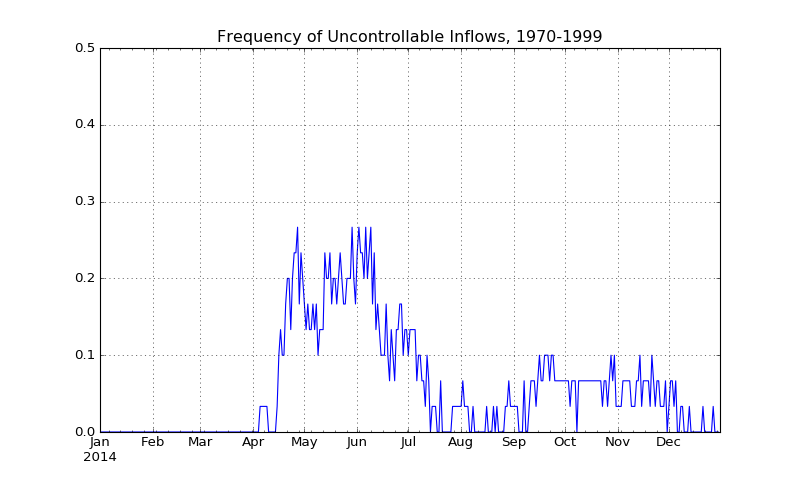

In [149]:
plt.figure(figsize=(10,6))
f = e/cnt
f.plot()
plt.title('Frequency of Uncontrollable Inflows, 1970-1999')
plt.ylim(0,0.5)
plt.grid()
plt.savefig('../images/RLMaxFlowFreq1970.png')

## 2000 Rule Curve Analysis

$$Q_{in} \leq Q_{in}^{max} = A(h)\frac{dh}{dt} + Q_{out}^{max}(h)$$

### Lake Area

<IPython.core.display.Javascript object>


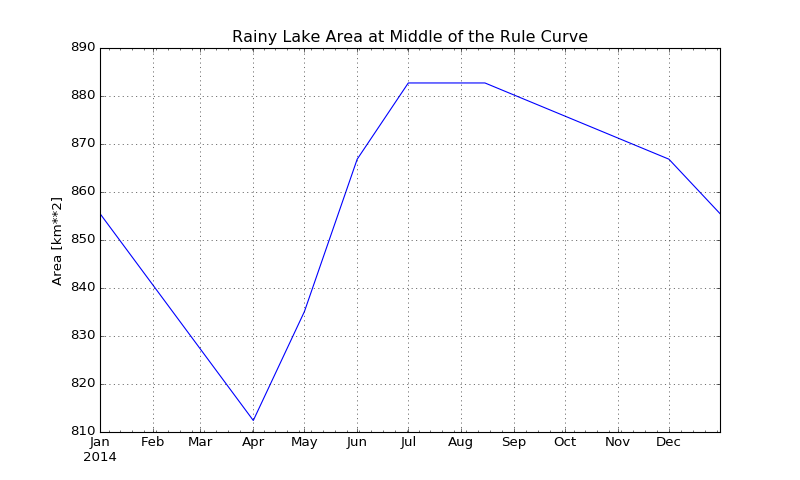

In [157]:
plt.figure(figsize=(10,6))
a2000 = 90.73 * m2000 - 2.975e+04
a2000.plot()
plt.title('Rainy Lake Area at Middle of the Rule Curve')
plt.ylabel('Area [km**2]')
plt.grid()

### Imputed Flowrate due to changes in level

$$A(h) \frac{dh}{dt}$$

<IPython.core.display.Javascript object>


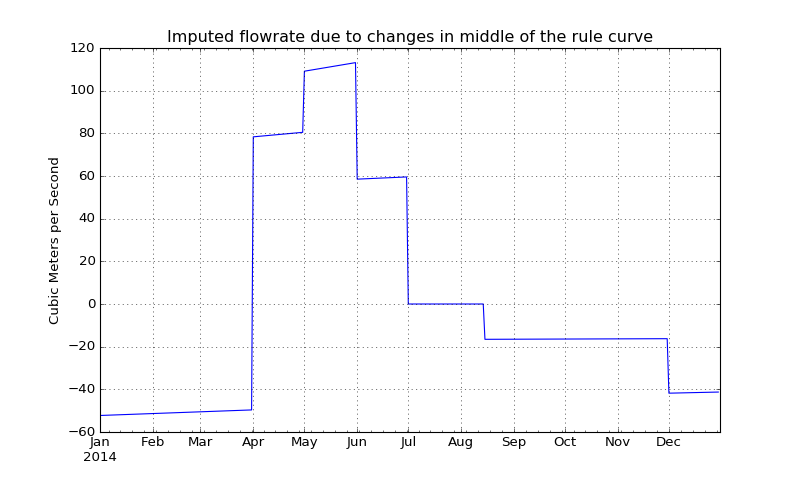

In [158]:
plt.figure(figsize=(10,6))
dv = (m2000.shift(-1) - m2000)*area*1.0e6/86400.0
dv.plot()
plt.ylabel('Cubic Meters per Second')
plt.title('Imputed flowrate due to changes in middle of the rule curve')
plt.grid()

<IPython.core.display.Javascript object>


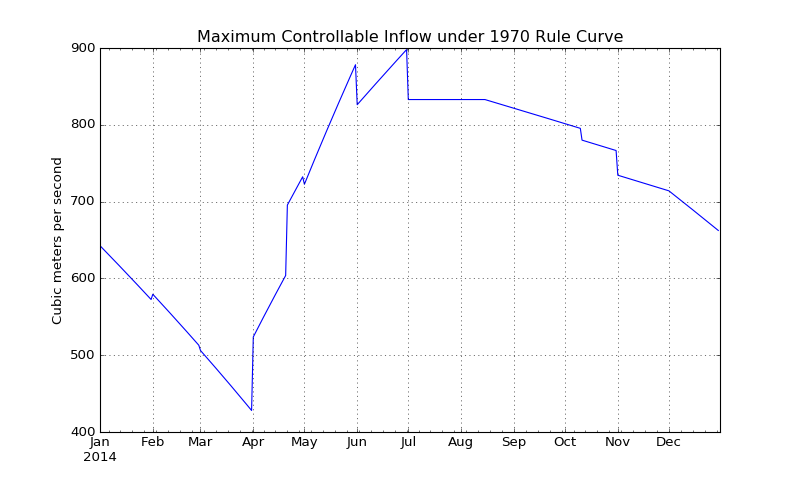

In [136]:
qout2000 = 650.0*(m2000-336.2)**0.7


qin2000 = qout2000 + dv

plt.figure(figsize=(10,6))
qin2000.plot()
plt.title('Maximum Controllable Inflow under 1970 Rule Curve')
plt.ylabel('Cubic meters per second')
plt.grid()

<IPython.core.display.Javascript object>


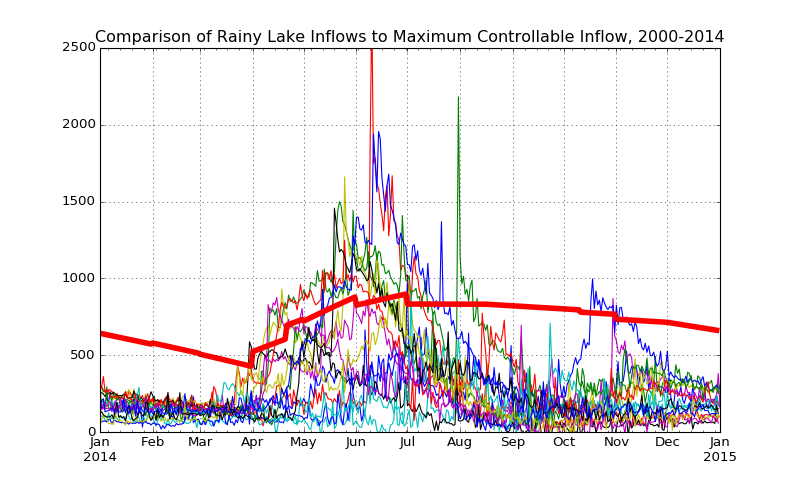

In [159]:
plt.figure(figsize=(10,6))

RLInflow = pd.read_pickle('../data/RLInflow.pkl')

e = 0*qin_max
cnt = 0

for (yr,r) in RLInflow['2000':'2014'].groupby(RLInflow['2000':'2014'].index.year):
    shift = datetime.datetime(2014,1,1) - datetime.datetime(yr,1,1)
    r = r.tshift(shift.days)
    r.plot()
    e += (r - qin2000) > 0.0
    cnt += 1

qin2000.plot(color='red',lw=5)
plt.title('Comparison of Rainy Lake Inflows to Maximum Controllable Inflow, 2000-2014')
plt.ylim(0,2500)
plt.grid()
plt.savefig('../images/RLMaxFlow2000.png')

<IPython.core.display.Javascript object>


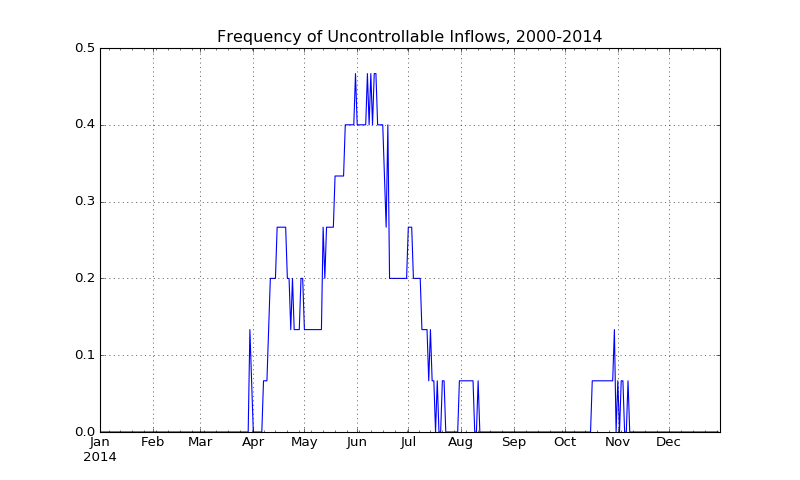

In [155]:
plt.figure(figsize=(10,6))
f = e/cnt
f.plot()
plt.title('Frequency of Uncontrollable Inflows, 2000-2014')
plt.ylim(0,0.5)
plt.grid()
plt.savefig('../images/RLMaxFlowFreq2000.png')

## <a name=section06></a>Conclusions